In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Data Preprocessing

# 1. Load the dataset
df = pd.read_csv('loan_data.csv')  # Replace with your file



In [3]:
# 2. Basic info
print(df.head())
print(df.info())
print(df.isnull().sum())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [4]:
# 3. Fill missing values

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [5]:
# 4. Encode categorical variables
cat_cols = ['person_gender', 'person_education', 'person_home_ownership', 
            'loan_intent', 'previous_loan_defaults_on_file']

In [6]:

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
#Feature Scaling
# Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

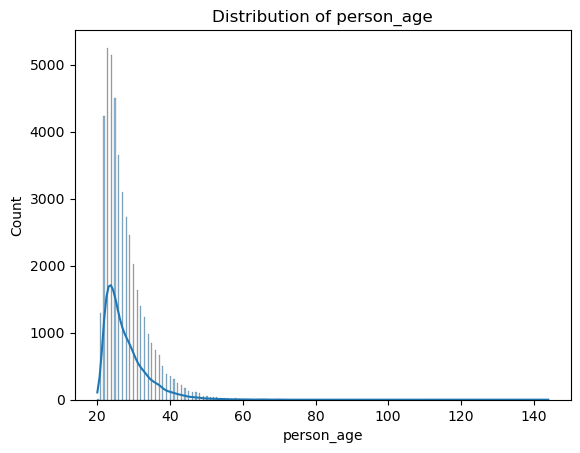

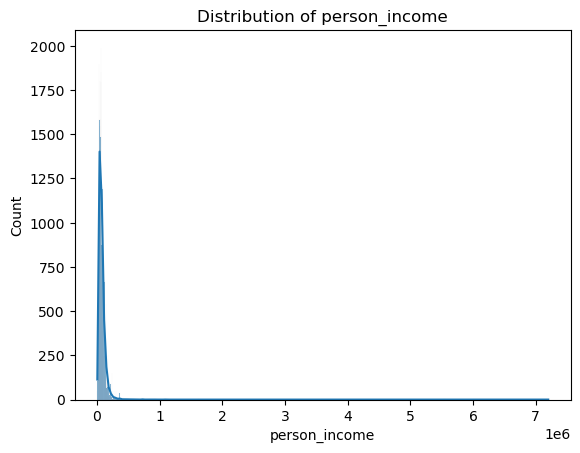

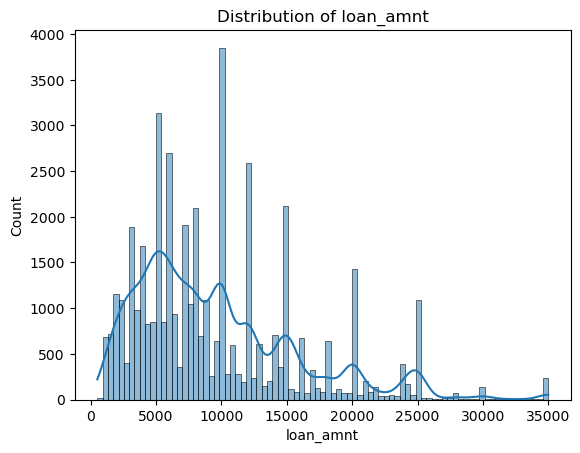

In [11]:
#EDA (Exploratory Data Analysis)
# Univariate
for col in ['person_age', 'person_income', 'loan_amnt']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()





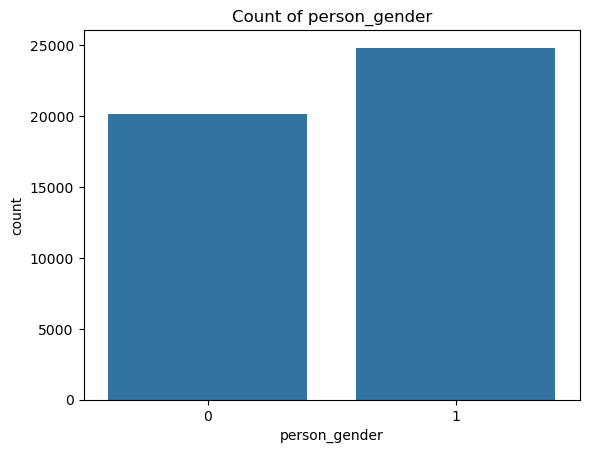

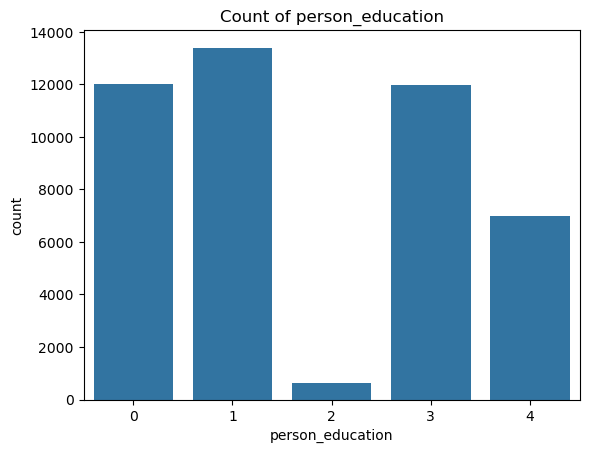

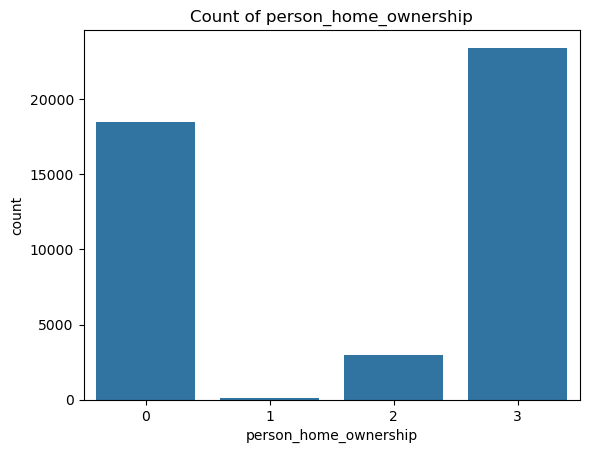

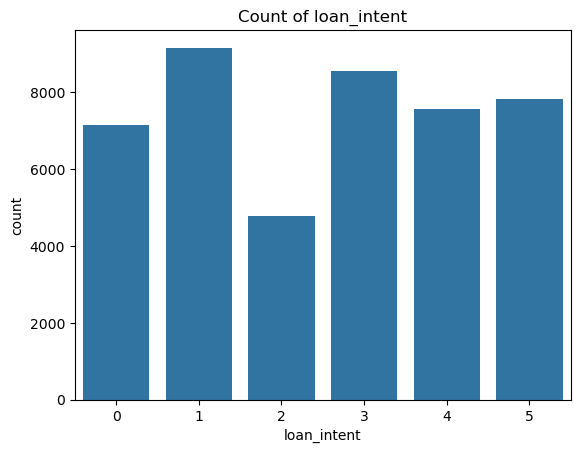

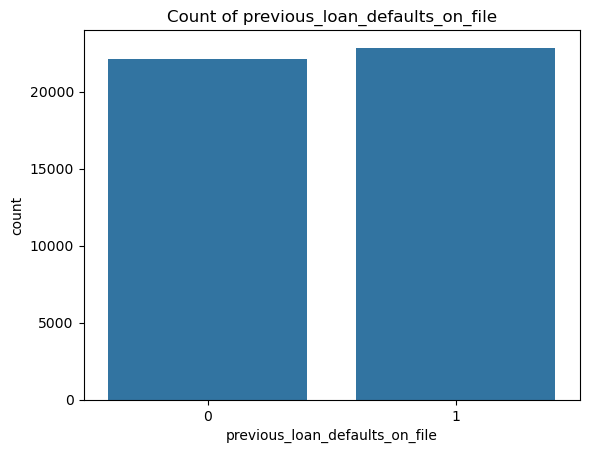

In [9]:
# Categorical
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()

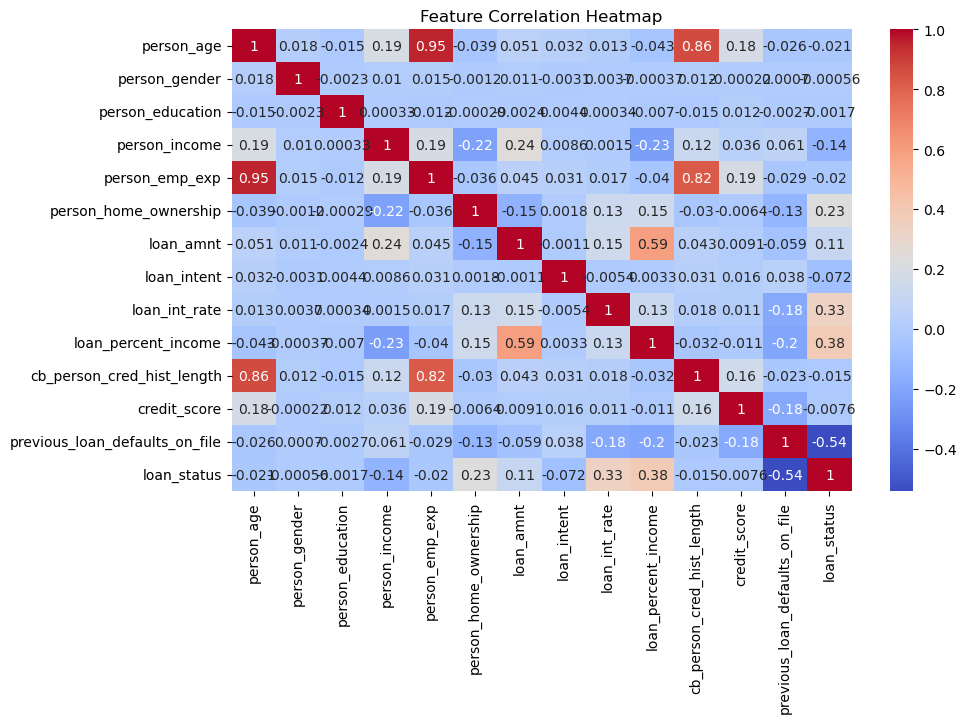

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
#Model Training & Evaluation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different K values
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k}, Accuracy={acc:.4f}")

K=1, Accuracy=0.8699
K=2, Accuracy=0.8748
K=3, Accuracy=0.8836
K=4, Accuracy=0.8852
K=5, Accuracy=0.8914
K=6, Accuracy=0.8937
K=7, Accuracy=0.8949
K=8, Accuracy=0.8952
K=9, Accuracy=0.8967
K=10, Accuracy=0.8970
K=11, Accuracy=0.8971
K=12, Accuracy=0.8952
K=13, Accuracy=0.8966
K=14, Accuracy=0.8961
K=15, Accuracy=0.8966


In [13]:
# Final Evaluation on best k(k=11)

# Final model with best K
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model with K=11
best_knn = KNeighborsClassifier(n_neighbors=11)
best_knn.fit(X_train, y_train)

# Make predictions
y_pred_final = best_knn.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Accuracy with K=11: {final_accuracy:.4f}")


Confusion Matrix:
 [[6661  329]
 [ 597 1413]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6990
           1       0.81      0.70      0.75      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.83      0.84      9000
weighted avg       0.89      0.90      0.89      9000


Final Accuracy with K=11: 0.8971


In [14]:
import joblib
joblib.dump(best_knn, 'best_knn_model_k11.pkl')


['best_knn_model_k11.pkl']

In [15]:
# 🔍 Final Evaluation with Best K
best_k = 11  # Set this to the best K you observed
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Predict on test data
y_pred_final = knn_final.predict(X_test)

# Print evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Final Evaluation on Test Set (K = 11):")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print(f"\nFinal Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")


✅ Final Evaluation on Test Set (K = 11):

Confusion Matrix:
 [[6661  329]
 [ 597 1413]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      6990
           1       0.81      0.70      0.75      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.83      0.84      9000
weighted avg       0.89      0.90      0.89      9000


Final Accuracy: 0.8971


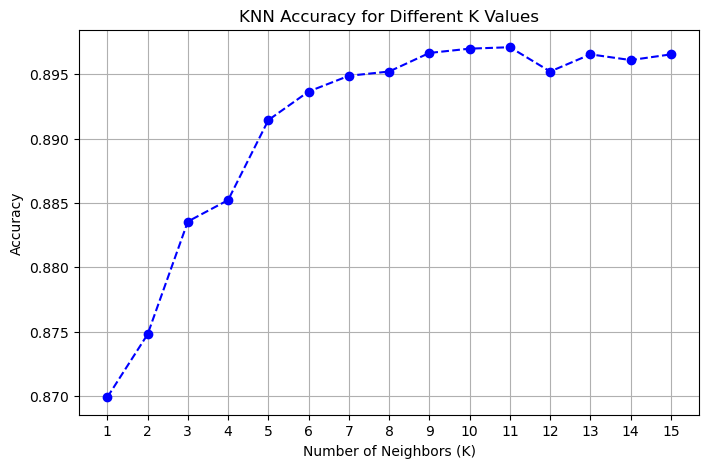

In [16]:
# 📊 Plot Accuracy vs. K
accuracies = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, 16), accuracies, marker='o', linestyle='--', color='blue')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()
